Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data shapes: Train images (60000, 28, 28, 1), Train labels (60000, 10)
Visualizing sample images...


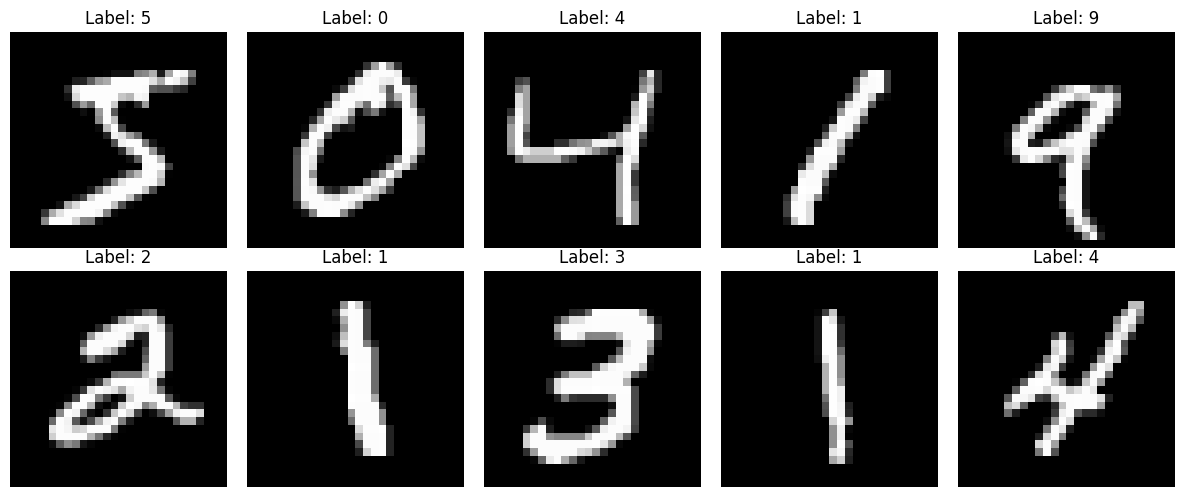

Building CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467,818 (1.78 MB)

 Trainable params: 467,818 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 208s 483ms/step - accuracy: 0.8122 - loss: 0.5759 - val_accuracy: 0.9868 - val_loss: 0.0478 - learning_rate: 0.0010
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 258s 475ms/step - accuracy: 0.9745 - loss: 0.0897 - val_accuracy: 0.9907 - val_loss: 0.0354 - learning_rate: 0.0010
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 204s 479ms/step - accuracy: 0.9816 - loss: 0.0614 - val_accuracy: 0.9903 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 201s 476ms/step - accuracy: 0.9865 - loss: 0.0447 - val_accuracy: 0.9905 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 197s 464ms/step - accuracy: 0.9881 - loss: 0.0378 - val_accuracy: 0.9938 - val_loss: 0.0283 - learning_rate: 0.0010
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 206s 474ms/step - accuracy: 0.9907 - loss: 0.0303 - val_accuracy: 0.9927 - val_loss: 0.0293 - learning_rate: 0.0010
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20

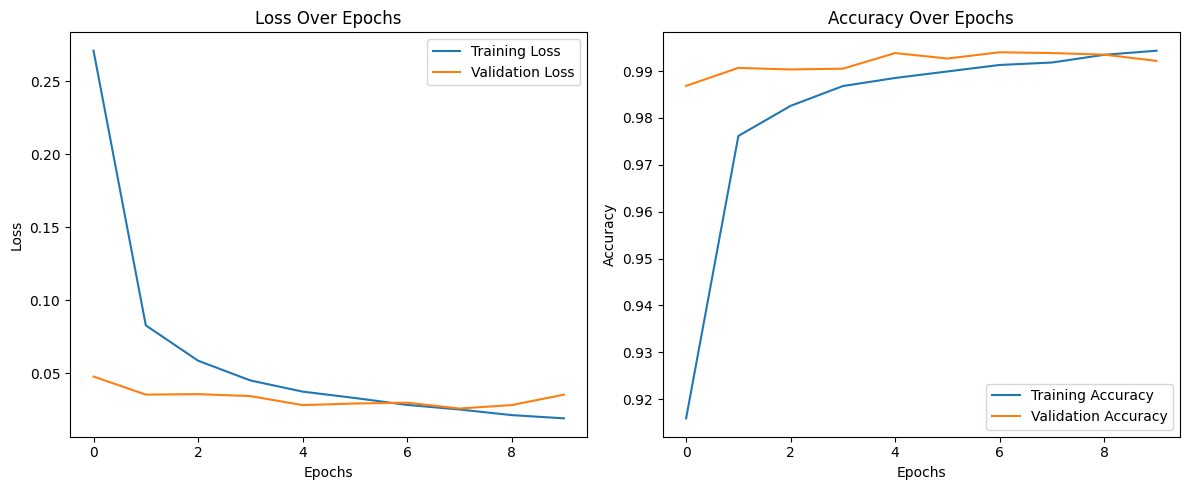

Evaluating on test set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9923 - loss: 0.0244
Test accuracy: 0.9938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


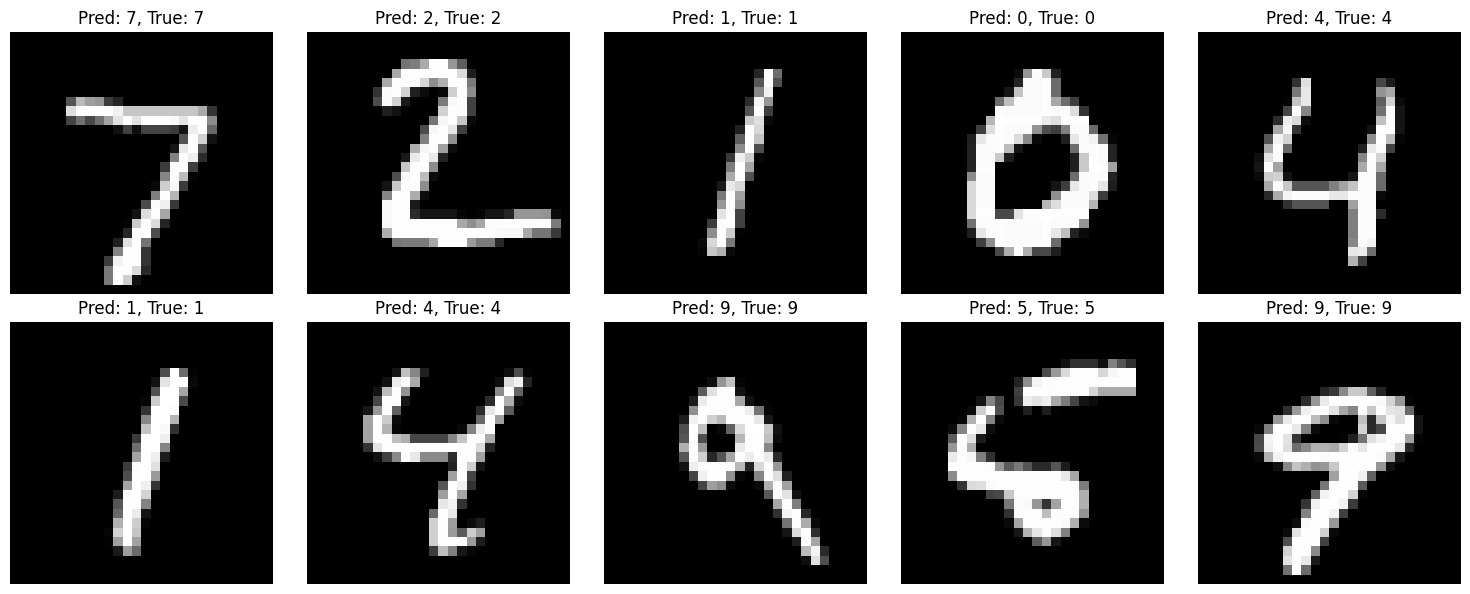

Completed!


In [ ]:
"""
Handwritten Digit Classification with CNN
==========================================
This script builds and trains a CNN model to classify handwritten digits using the MNIST dataset.
"""

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.datasets import mnist

# Load and prepare MNIST data
print("Loading MNIST dataset...")
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the data
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
train_labels_encoded = to_categorical(train_labels, 10)
test_labels_encoded = to_categorical(test_labels, 10)

print(f"Data shapes: Train images {train_images.shape}, Train labels {train_labels_encoded.shape}")

# Display some samples
print("Visualizing sample images...")
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Define the model architecture
print("Building CNN model...")
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2),

    # Second convolutional block
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation='softmax'),
])

# Display model summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set up learning rate reducer
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train the model
print("Training the model...")
history = model.fit(
    train_images, train_labels_encoded,
    epochs=10,  # Reduced for quicker demonstration
    batch_size=128,
    validation_split=0.1,
    callbacks=[lr_reducer]
)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_acc = model.evaluate(test_images, test_labels_encoded)
print(f"Test accuracy: {test_acc:.4f}")

# Generate predictions
predictions = model.predict(test_images[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Display predictions
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}, True: {test_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print("Completed!")
